<a href="https://colab.research.google.com/github/MTracchia/Laboratorio-5/blob/main/Procesos_estocasticos_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.io import wavfile
from scipy.io.wavfile import write
import IPython.display as ipd
from IPython.lib.display import Audio
import scipy.io.wavfile as waves

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/Repositorio de L5/Grabaciones - pro. estocásticos/llamador-10 min.wav'

Mounted at /content/drive


In [ ]:
def read(filename):
    rate, data = wavfile.read(filename)
    length = data.shape[0] / rate
    time = np.linspace(0, length, data.shape[0], endpoint=False)
    return time, data

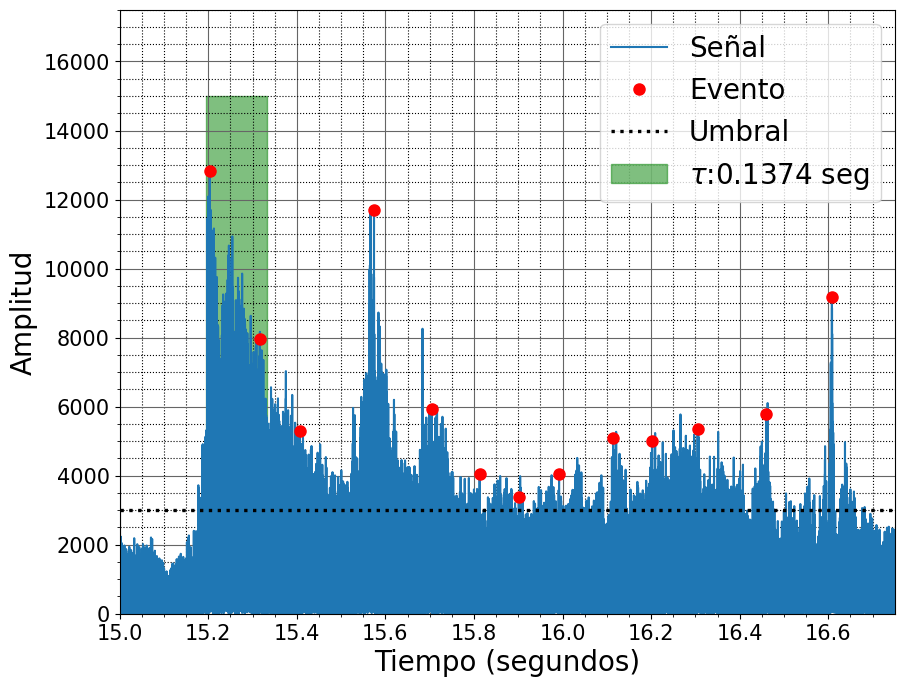

Cantidad de eventos:3070


In [ ]:
time, data = read(filename)
data_canal=data[:,0]

from scipy.signal import find_peaks
height = 3000
peaks, info = find_peaks(data_canal, height=height,distance=4200)


plt.figure(figsize=(10, 8),dpi=100)
plt.plot(time,np.abs(data_canal),label="Señal")
plt.plot(time[peaks], data_canal[peaks], "o",color="red",label="Evento",markersize=8)
plt.axhline(height, linestyle=":", color='k',linewidth=2.4,label="Umbral");

plt.xlabel('Tiempo (segundos)',fontsize=20)
plt.ylabel('Amplitud',fontsize=20)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='k', linestyle=':', alpha=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

'''
plt.axhline(pulso_canal[tau][-1], linestyle="dashed", color='red',label='Umbral')
plt.fill_betweenx([0,max],time_p[np.where(pulso_canal==max)[0]],time_p[tau][-1], color='firebrick' ,alpha=0.3, label=r"Tiempo de dacaimiento caracteristico $\tau$ "+ "= {:.3f} s".format(Tau) )
'''

plt.xlim(15,16.75)
plt.ylim(0,17500)
tau=0.1374
ini=15.195
plt.fill_betweenx([height,15000],ini,ini+tau,color="green",alpha=0.5,label="$\\tau$:{} seg".format(tau))
plt.legend(fontsize=20)


plt.show()

print("Cantidad de eventos:{}".format(len(peaks)))

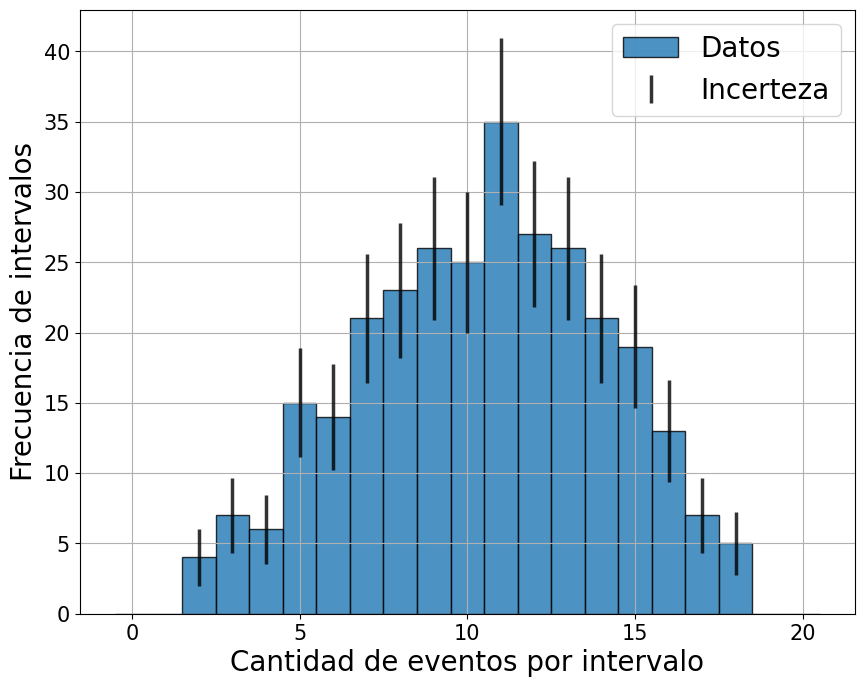

In [ ]:
#Rutina para contar la cantidad de eventos por intervalo de tiempo
def count_range_in_list(li, min, max):
	ctr = 0
	for x in li:
		if min <= x <= max:
			ctr += 1
	return ctr

list1 = time[peaks]
delta = 2 #s
y=0
c=[]
x=[]
d=[]

for x in range(1, int(time[peaks[-1]])+delta, delta): #el iterador se mueve de a "delta" pasos
    c.append(count_range_in_list(list1,y, x))
    #print("{},{}".format(x,y))
    y=x
    d.append(x)

plt.figure(figsize=(10, 8),dpi=100)
#Heights, Bins, _= plt.hist(c);

#Heights, bins = np.histogram(c, bins=np.arange(0, np.max(c)+3))
Heights, bins = np.histogram(c, bins=np.arange(0, np.bincount(c).argmax()*2))
plt.bar(bins[:-1], Heights, width=1, ec='k',label="Datos",alpha=0.8)
#plt.errorbar(bins[:-1], Heights, xerr=0, yerr=np.sqrt(Heights),color="k")
plt.errorbar(bins[:-1], Heights, xerr=None, yerr=(np.sqrt(Heights)),color="k",linestyle="",alpha=0.8,elinewidth=2.5,label="Incerteza")
plt.xlabel("Cantidad de eventos por intervalo",fontsize=20)
plt.ylabel("Frecuencia de intervalos",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.grid()

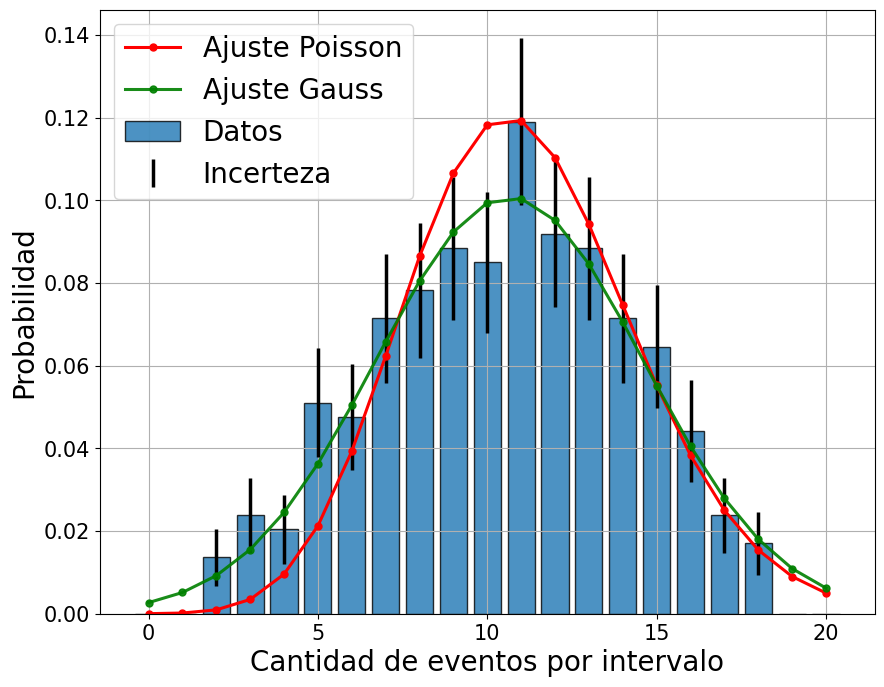

chi2 gauss casero:5.387441802736314
chi2 poisson casero reducido:1.163350830144665
chi2 gauss casero reducido:0.2693720901368157
p-valor casero gauss:0.9995074390555535
media de gauss= 10.656504324782663 sigma= 3.957414926386576
Chi2: 0.3828713609636665
P-valor: 0.9999999999998879
lambda: 11.097059358718129
Longitud del intervalo (segundos): 2


chi2 casero:23.267016602893296
chi2 casero reducido:1.163350830144665
p-valor casero:0.2758744517658924


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


'\nfrom scipy.stats import poisson, chi2, norm\n\n\ndef gauss_f(x,mean,sigma):\n  return norm.pdf(x,mean,sigma) \n\n\n\n\nparam_gauss,cov_gauss=  curve_fit(gauss_f,bins[:-1], normHeights)\n\n\nplt.plot(bins[:-1],gauss_f(bins[:-1],*param_gauss),marker="o",linestyle=":",color="orange",label="Ajuste Gauss",alpha=0.8,markersize=5)\n\nplt.bar(bins[:-1],normHeights,ec=\'k\',label="Datos",alpha=0.8);\nplt.errorbar(bins[:-1], normHeights, xerr=0, yerr=(np.sqrt(Heights))/sum(Heights),color="k",linestyle=\' \')\nplt.xlabel("Cantidad de eventos por intervalo")\nplt.ylabel("Probabilidad")\nplt.legend()\nplt.grid()\nplt.show()\n\n\n#Parámetros\nfrom scipy.stats import chisquare\nchiSqr, pVal = chisquare(normHeights,poisson_f(bins[:-1],*parameters),ddof=1)\nprint("Chi2: " + str(chiSqr))\nprint(\'media de gauss=\',param_gauss[0],\'sigma=\',param_gauss[1])\nprint("P-valor: " + str(pVal))\nprint("lambda poisson: "+ str(parameters[0]))\n#print("Longitud del intervalo (segundos): " + str(delta))\n\n\n#Ca

In [ ]:
from scipy.stats import poisson, chi2,norm
from scipy.optimize import curve_fit
import scipy as sp

def poisson_f(k,lamb):
  return poisson.pmf(k,lamb)

def gauss_f(x,mean,sigma):
  return norm.pdf(x,mean,sigma) 

#mean_bins = 0.5*(Bins[1:]+Bins[:-1]) #No agarro los extremos- calculo la mitad de cada bin
normHeights=Heights/sum(Heights)
parameters, cov_matrix = curve_fit(poisson_f,bins[:-1], normHeights)
param_gauss,cov_gauss=  curve_fit(gauss_f,bins[:-1], normHeights)
plt.figure(figsize=(10, 8),dpi=100)

plt.bar(bins[:-1],normHeights,ec='k',label="Datos",alpha=0.8);
plt.errorbar(bins[:-1], normHeights, xerr=None, yerr=(np.sqrt(Heights))/sum(Heights),color="k",linestyle="",elinewidth=2.5,label="Incerteza")
plt.plot(bins[:-1],poisson_f(bins[:-1],*parameters),marker="o",markersize=5,linestyle="-",color="red",label="Ajuste Poisson",linewidth=2.2)
plt.plot(bins[:-1],gauss_f(bins[:-1],*param_gauss),marker="o",linestyle="-",color="green",label="Ajuste Gauss",alpha=0.9,markersize=5,linewidth=2.2)
plt.xlabel("Cantidad de eventos por intervalo",fontsize=20)
plt.ylabel("Probabilidad",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.grid()
plt.show()


#CHI2-CASERO
sigma=(np.sqrt(Heights))/sum(Heights)
def chi_square(y_data, y_model, sigma):
  return np.nansum((y_data/sigma -y_model/sigma)**2) 
chi = chi_square(normHeights, poisson_f(bins[:-1],*parameters), sigma)


chi_gauss=chi_square(normHeights, gauss_f(bins[:-1],*param_gauss), sigma)
print("chi2 gauss casero:{}".format(chi_gauss))

dof=1
nu = len(normHeights)-dof
chi_red = chi/nu
print("chi2 poisson casero reducido:{}".format(chi_red))
chi_gauss_red = chi_gauss/nu
print("chi2 gauss casero reducido:{}".format(chi_gauss_red))


#calculo p-valor
def p_value(chi, y_data, nu):
  p = 1 -sp.stats.chi2.cdf(chi, nu)
  return p


p_val_gauss=p_value(chi_gauss,normHeights,nu)
print("p-valor casero gauss:{}".format(p_val_gauss))
print('media de gauss=',param_gauss[0],'sigma=',param_gauss[1])

#CHI2 RED-CASERO
dof=1
nu = len(normHeights)-dof
chi_red = chi/nu

#P-VALOR-CASERO
def p_value(chi, y_data, nu):
  p = 1 -sp.stats.chi2.cdf(chi, nu)
  return p
p_val=p_value(chi,normHeights,nu)


#Parámetros
from scipy.stats import chisquare
chiSqr, pVal = chisquare(normHeights,poisson_f(bins[:-1],*parameters),ddof=1)

print("Chi2: " + str(chiSqr))
print("P-valor: " + str(pVal))
print("lambda: "+ str(parameters[0]))
print("Longitud del intervalo (segundos): " + str(delta))
print("\n")
print("chi2 casero:{}".format(chi))
print("chi2 casero reducido:{}".format(chi_red))
print("p-valor casero:{}".format(p_val))



'''
from scipy.stats import poisson, chi2, norm


def gauss_f(x,mean,sigma):
  return norm.pdf(x,mean,sigma) 

param_gauss,cov_gauss=  curve_fit(gauss_f,bins[:-1], normHeights)


plt.plot(bins[:-1],gauss_f(bins[:-1],*param_gauss),marker="o",linestyle=":",color="orange",label="Ajuste Gauss",alpha=0.8,markersize=5)

plt.bar(bins[:-1],normHeights,ec='k',label="Datos",alpha=0.8);
plt.errorbar(bins[:-1], normHeights, xerr=0, yerr=(np.sqrt(Heights))/sum(Heights),color="k",linestyle=' ')
plt.xlabel("Cantidad de eventos por intervalo")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid()
plt.show()


#Parámetros
from scipy.stats import chisquare
chiSqr, pVal = chisquare(normHeights,poisson_f(bins[:-1],*parameters),ddof=1)
print("Chi2: " + str(chiSqr))
print('media de gauss=',param_gauss[0],'sigma=',param_gauss[1])
print("P-valor: " + str(pVal))
print("lambda poisson: "+ str(parameters[0]))
#print("Longitud del intervalo (segundos): " + str(delta))


#Calculo chi2  y chi reducido de forma casera
sigma=(np.sqrt(Heights))/sum(Heights)
def chi_square(y_data, y_model, sigma):
  return np.nansum((y_data/sigma -y_model/sigma)**2) 
chi = chi_square(normHeights, poisson_f(bins[:-1],*parameters), sigma)
print("chi2 poisson casero:{}".format(chi))

chi_gauss=chi_square(normHeights, gauss_f(bins[:-1],*param_gauss), sigma)
print("chi2 gauss casero:{}".format(chi_gauss))

dof=1
nu = len(normHeights)-dof
chi_red = chi/nu
print("chi2 poisson casero reducido:{}".format(chi_red))
chi_gauss_red = chi_gauss/nu
print("chi2 gauss casero reducido:{}".format(chi_gauss_red))


#calculo p-valor
def p_value(chi, y_data, nu):
  p = 1 -sp.stats.chi2.cdf(chi, nu)
  return p

p_val=p_value(chi,normHeights,nu)
print("p-valor casero poisson:{}".format(p_val))
p_val_gauss=p_value(chi_gauss,normHeights,nu)
print("p-valor casero gauss:{}".format(p_val_gauss))



'''


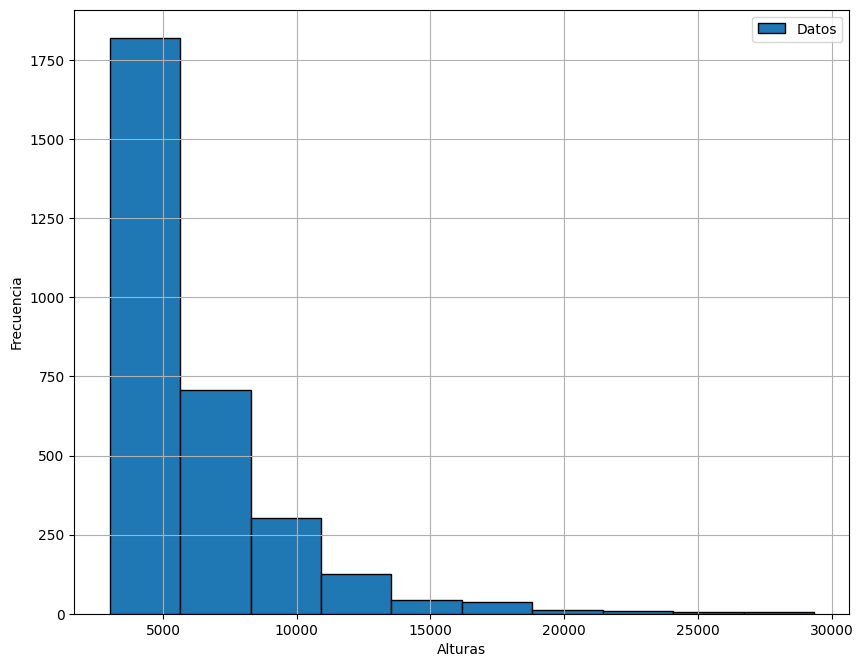

In [ ]:
plt.figure(figsize=(10, 8),dpi=100)
plt.hist(info['peak_heights'],ec='k',label="Datos");
plt.ylabel("Frecuencia")
plt.xlabel("Alturas");
plt.grid()
plt.legend()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

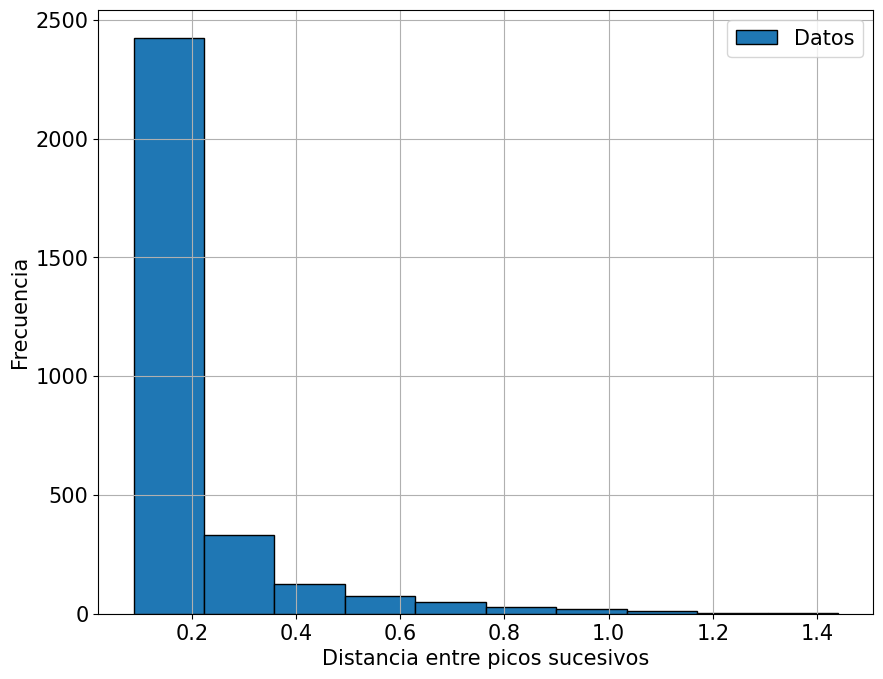

In [ ]:

delta = time[peaks[1:]] - time[peaks[:-1]]
plt.figure(figsize=(10, 8),dpi=100)
plt.hist(delta,ec='k',label="Datos");
plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Distancia entre picos sucesivos",fontsize=15);
plt.ylabel("Frecuencia",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)